In [12]:
#import shap
import joblib
import pandas as pd
import numpy as np
from feature_engine.encoding import MeanEncoder
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve, classification_report

In [13]:
def import_data(pth):

    data = pd.read_csv(pth)

    df = pd.DataFrame(data)

    return df

In [14]:
df = import_data("./data/bank_data.csv")

In [ ]:
def perform_feature_engineering(
        df,
        response="X, X_train, X_test, y_train, y_test"):
    '''
    input:
              df: pandas dataframe
              response: string of response name [optional argument that could be used for naming variables or index y column]

    output:
              X_train: X training data
              X_test: X testing data
              y_train: y training data
              y_test: y testing data
    '''
    keep_cols = [
        'Customer_Age',
        'Dependent_count',
        'Months_on_book',
        'Total_Relationship_Count',
        'Months_Inactive_12_mon',
        'Contacts_Count_12_mon',
        'Credit_Limit',
        'Total_Revolving_Bal',
        'Avg_Open_To_Buy',
        'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt',
        'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1',
        'Avg_Utilization_Ratio',
        'Gender_Churn',
        'Education_Level_Churn',
        'Marital_Status_Churn',
        'Income_Category_Churn',
        'Card_Category_Churn']

    X = pd.DataFrame()
    X[keep_cols] = df[keep_cols]

    y = df['Churn']

    response_list = response.split(',')

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    return dict(zip(response_list, [X, X_train, X_test, y_train, y_test]))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10127 non-null  int64  
 1   CLIENTNUM                 10127 non-null  int64  
 2   Attrition_Flag            10127 non-null  object 
 3   Customer_Age              10127 non-null  int64  
 4   Gender                    10127 non-null  object 
 5   Dependent_count           10127 non-null  int64  
 6   Education_Level           10127 non-null  object 
 7   Marital_Status            10127 non-null  object 
 8   Income_Category           10127 non-null  object 
 9   Card_Category             10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [16]:
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)
df.drop(columns='Attrition_Flag', inplace=True)

In [17]:
cat_vars = [var for var in df.columns if df[var].dtype == "object"]

In [18]:
def encoder_helper(df, category_lst, response="Churn"):
    '''
    helper function to turn each categorical column into a new column with
    proportion of churn for each category - associated with cell 15 from the notebook

    input:
            df: pandas dataframe
            category_lst: list of columns that contain categorical features
            response: string of response name [optional argument that could be used for naming variables or index y column]

    output:
            df: pandas dataframe with new columns for
    '''
    encoder = MeanEncoder(variables=category_lst)
    encoder.fit(df[category_lst], df['Churn'])
    df_encoder = encoder.transform(df[category_lst])

    df_encoder.columns = [
        str(col) + '_' + response for col in df_encoder.columns]

    df_new = pd.concat([df, df_encoder], axis=1)

    return df_new

In [19]:
df = encoder_helper(df, cat_vars)
df.drop(columns=cat_vars, inplace=True)

In [20]:
def perform_feature_engineering(
    df,
    response="X_train,X_test,y_train,y_test"):
    '''
    input:
              df: pandas dataframe
              response: string of response name [optional argument that could be used for naming variables or index y column]

    output:
              X_train: X training data
              X_test: X testing data
              y_train: y training data
              y_test: y testing data
    '''
    keep_cols = [
        'Customer_Age',
        'Dependent_count',
        'Months_on_book',
        'Total_Relationship_Count',
        'Months_Inactive_12_mon',
        'Contacts_Count_12_mon',
        'Credit_Limit',
        'Total_Revolving_Bal',
        'Avg_Open_To_Buy',
        'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt',
        'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1',
        'Avg_Utilization_Ratio',
        'Gender_Churn',
        'Education_Level_Churn',
        'Marital_Status_Churn',
        'Income_Category_Churn',
        'Card_Category_Churn']

    X = pd.DataFrame()
    X[keep_cols] = df[keep_cols]

    y = df['Churn']

    response_list = response.split(',')

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    return dict(zip(response_list, [X_train, X_test, y_train, y_test]))

In [21]:
feature_engineering = perform_feature_engineering(df)

In [22]:
feature_engineering['X_train']

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
415,49,2,38,3,2,0,8077.0,1965,6112.0,0.637,1329,26,0.444,0.243,0.146152,0.178295,0.151269,0.134807,0.160979
3749,61,0,51,4,2,2,8476.0,0,8476.0,0.675,3889,67,0.489,0.000,0.173572,0.152012,0.169414,0.168165,0.160979
9295,27,0,19,1,1,3,34516.0,1131,33385.0,0.715,14716,112,0.750,0.033,0.146152,0.152024,0.172230,0.157655,0.147748
8290,52,1,36,1,1,3,3040.0,2517,523.0,0.774,4608,61,1.033,0.828,0.173572,0.168532,0.151269,0.171862,0.160979
7672,44,3,36,2,3,3,2228.0,0,2228.0,0.686,2523,45,0.607,0.000,0.173572,0.152012,0.169414,0.171862,0.160979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,44,1,38,3,2,5,4142.0,2517,1625.0,0.809,2104,44,0.833,0.608,0.173572,0.155691,0.169414,0.151397,0.160979
5191,53,3,36,4,3,6,7939.0,0,7939.0,0.551,2269,42,0.312,0.000,0.173572,0.152012,0.161765,0.168165,0.160979
5390,42,4,32,3,1,2,2314.0,1547,767.0,0.804,4678,74,1.000,0.669,0.173572,0.155691,0.172230,0.171862,0.160979
860,40,3,28,4,1,1,3563.0,1707,1856.0,0.506,1482,42,0.312,0.479,0.146152,0.168532,0.169414,0.151397,0.160979


In [23]:
type(feature_engineering['X_train'])

pandas.core.frame.DataFrame

In [24]:
# grid search
rfc = RandomForestClassifier(random_state=42)
lrc = LogisticRegression()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,100],
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
cv_rfc.fit(feature_engineering['X_train'], feature_engineering['y_train'])

lrc.fit(feature_engineering['X_train'], feature_engineering['y_train'])

y_train_preds_rf = cv_rfc.best_estimator_.predict(feature_engineering['X_train'])
y_test_preds_rf = cv_rfc.best_estimator_.predict(feature_engineering['X_test'])

y_train_preds_lr = lrc.predict(feature_engineering['X_train'])
y_test_preds_lr = lrc.predict(feature_engineering['X_test'])

# scores
print('random forest results')
print('test results')
print(classification_report(feature_engineering['y_test'], y_test_preds_rf))
print('train results')
print(classification_report(feature_engineering['y_train'], y_train_preds_rf))

print('logistic regression results')
print('test results')
print(classification_report(feature_engineering['y_test'], y_test_preds_lr))
print('train results')
print(classification_report(feature_engineering['y_train'], y_train_preds_lr))

C:\Users\Lamartine\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


random forest results
test results
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.93      0.80      0.86       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

train results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5957
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

logistic regression results
test results
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2543
           1       0.70      0.46      0.56       496

    accuracy                           0.88      3039
   macro avg       0.80      0.71     

In [10]:
def perform_eda(df):
    '''
    perform eda on df and save figures to images folder
    input:
            df: pandas dataframe

    output:
            None
    '''
    plt.figure(figsize=(20,10)) 
    df['Churn'].hist();
    plt.savefig('images/eda/churn_distribution.png')

    plt.figure(figsize=(20,10)) 
    df['Customer_Age'].hist();
    plt.savefig('images/eda/customer_age_distribution.png')
    
    plt.figure(figsize=(20,10)) 
    df.Marital_Status.value_counts('normalize').plot(kind='bar');
    plt.savefig('images/eda/marital_status_distribution.png')

    plt.figure(figsize=(20,10)) 
    sns.distplot(df['Total_Trans_Ct']);
    plt.savefig('images/eda/total_transaction_distribution.png')

    plt.figure(figsize=(20,10)) 
    sns.heatmap(df.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
    plt.savefig('images/eda/heatmap.png')

C:\Users\Lamartine\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


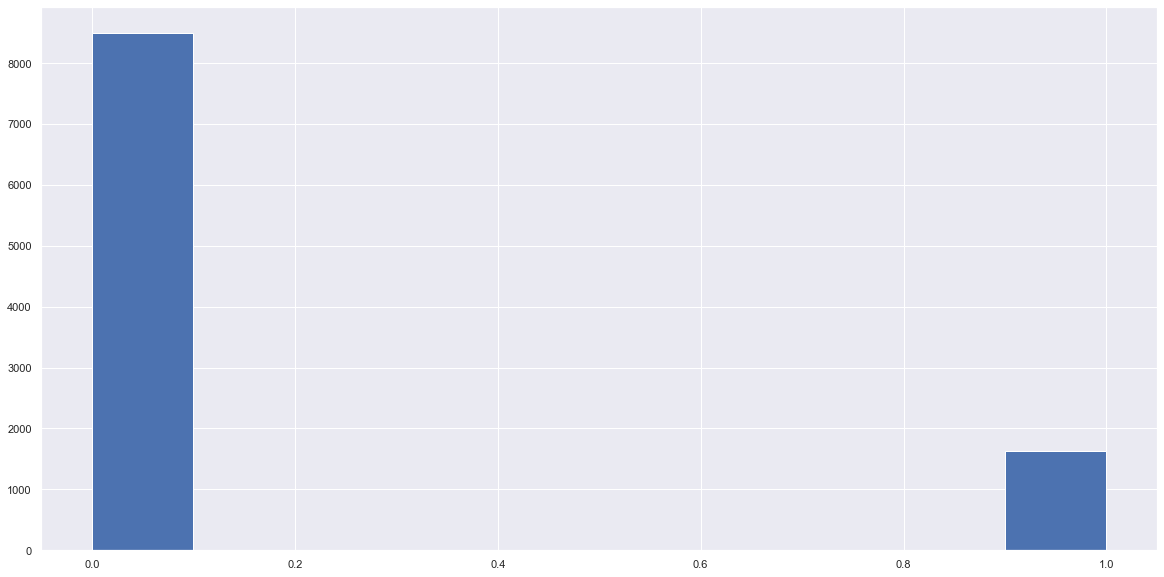

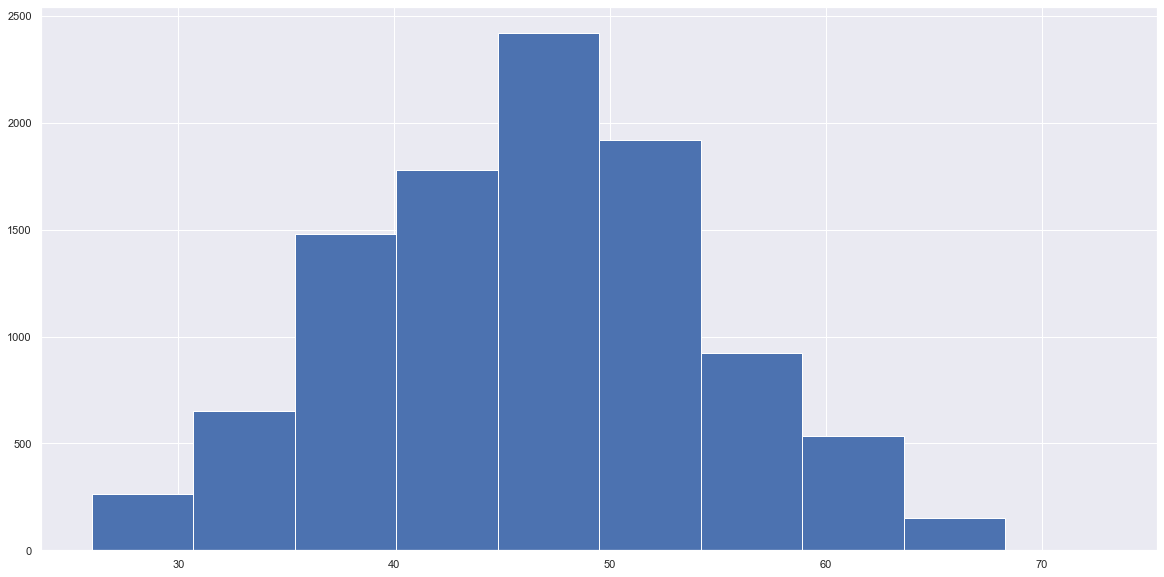

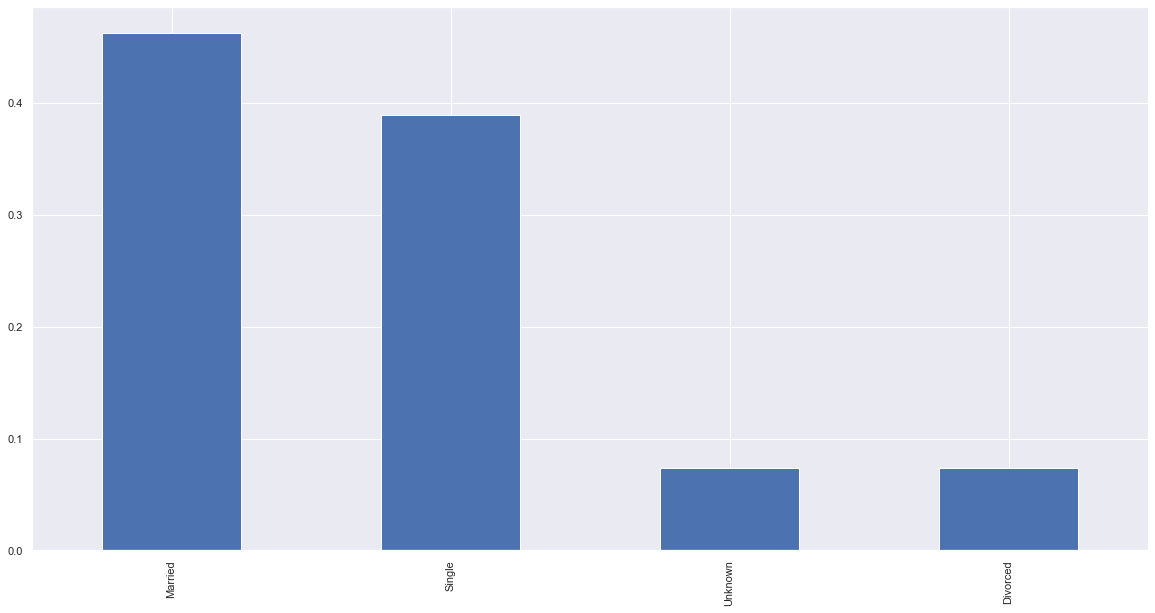

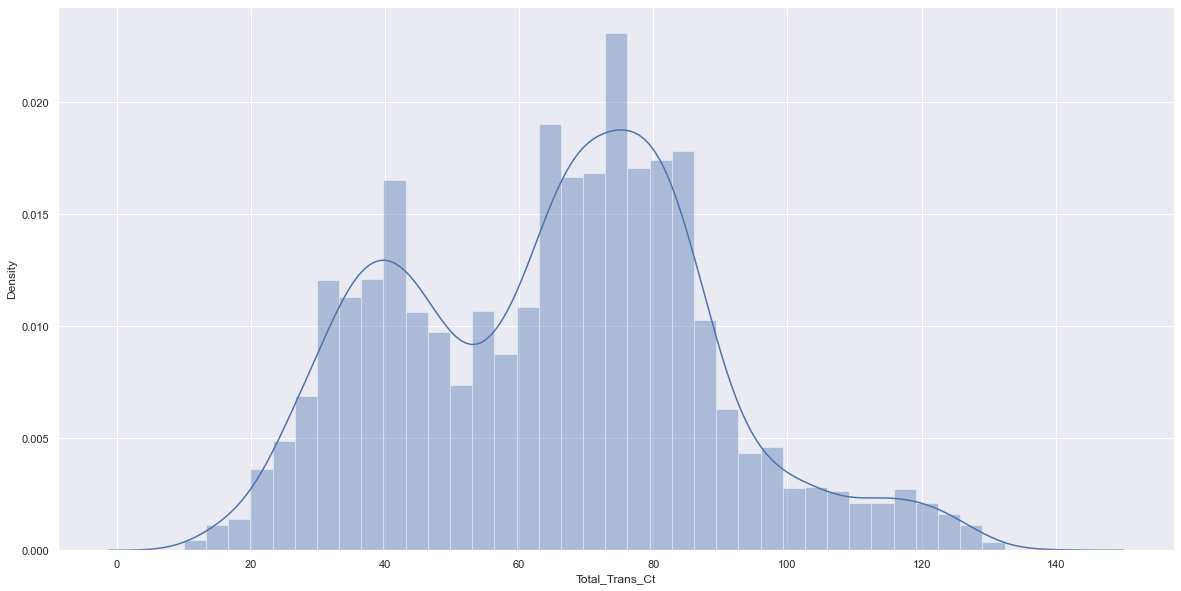

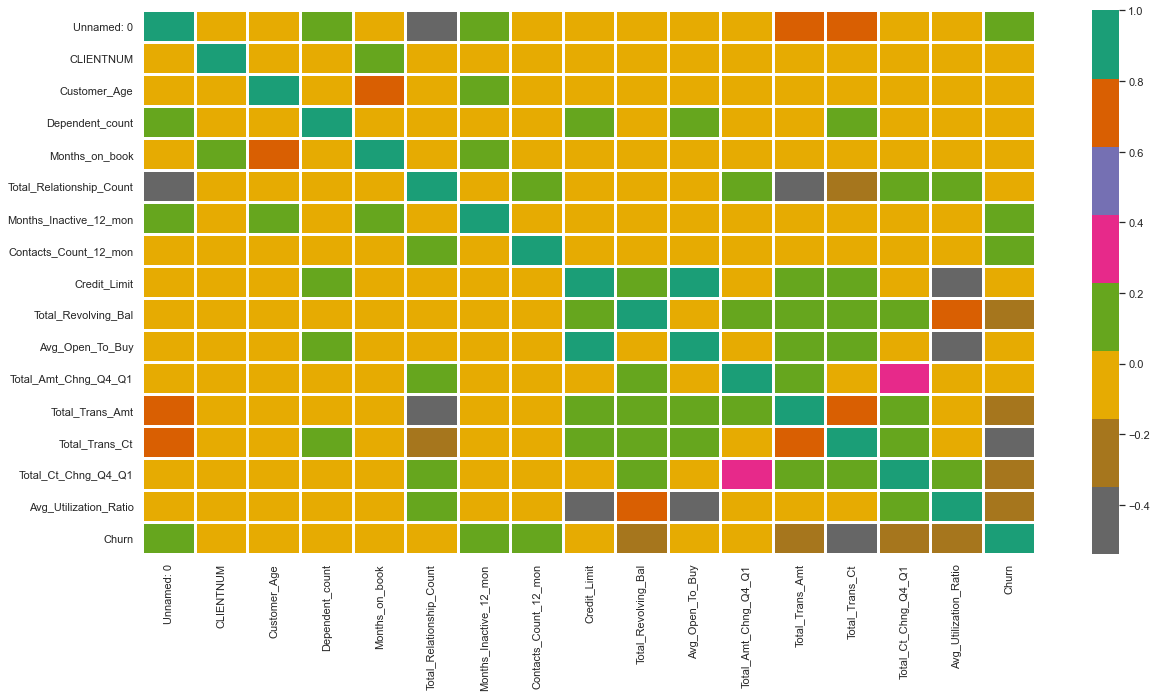

In [12]:
perform_eda(df)

In [5]:
from feature_engine.encoding import MeanEncoder

In [6]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

In [15]:
def encoder_helper(df, category_lst, response="Churn"):
    encoder = MeanEncoder(variables=category_lst)
    encoder.fit(df[category_lst], df['Churn'])
    df_t = encoder.transform(df[cat_columns])

    df_t.columns =[str(col) + '_' + response for col in df_t.columns]

    df = pd.concat([df, df_t], axis=1)

    return df

In [16]:
df = encoder_helper(df, cat_columns)

In [17]:
df

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,0.146152,0.152012,0.151269,0.134807,0.160979,0.146152,0.152012,0.151269,0.134807,0.160979
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,0.173572,0.155691,0.169414,0.171862,0.160979,0.173572,0.155691,0.169414,0.171862,0.160979
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,0.146152,0.155691,0.151269,0.157655,0.160979,0.146152,0.155691,0.151269,0.157655,0.160979
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,0.173572,0.152012,0.172230,0.171862,0.160979,0.173572,0.152012,0.172230,0.171862,0.160979
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,0.146152,0.159381,0.151269,0.134807,0.160979,0.146152,0.159381,0.151269,0.134807,0.160979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,...,0.146152,0.155691,0.169414,0.151397,0.160979,0.146152,0.155691,0.169414,0.151397,0.160979
10123,10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,...,0.146152,0.168532,0.161765,0.151397,0.160979,0.146152,0.168532,0.161765,0.151397,0.160979
10124,10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,...,0.173572,0.152012,0.151269,0.171862,0.160979,0.173572,0.152012,0.151269,0.171862,0.160979
10125,10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,...,0.146152,0.155691,0.172230,0.151397,0.160979,0.146152,0.155691,0.172230,0.151397,0.160979
